In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.gaussian_process import GaussianProcessClassifier
from keras.models import Model
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

import nltk
import nltk as nlp
import string
import re

### 데이터 불러오기

In [48]:
true = pd.read_csv("D:/학교/3학년/2학기/빅데이터분석실습/9주차/발표2/data/True.csv")
fake = pd.read_csv("D:/학교/3학년/2학기/빅데이터분석실습/9주차/발표2/data/Fake.csv")

In [49]:
true.sample(3)

,title,text,subject,date
10340,Trump says foreign policy team still not ready,(This version of the story was corrected to c...,politicsNews,"March 8, 2016"
11253,Puerto Rico's 2014 fiscal report close to rele...,NEW YORK (Reuters) - Puerto Rico’s long-awaite...,politicsNews,"January 13, 2016"
5071,"Facing test of resolve, Trump pushes ahead wit...",WASHINGTON (Reuters) - Faced with a growing te...,politicsNews,"March 8, 2017"


In [50]:
fake.sample(3)

,title,text,subject,date
17377,(VIDEO) ALAN DERSHOWITZ – SAD DAY FOR JUSTICE ...,You re At Forefront Of This Cause And As Youn...,Government News,"May 1, 2015"
17052,SLICK SCAM: John Kerry Warns Global Warming Wi...,"Sure, we need to save people from something th...",Government News,"Oct 9, 2015"
6040,Watch Morning Joe’s Mika DESTROY Paul Ryan Fo...,Republican House Speaker Paul Ryan has been ge...,News,"June 3, 2016"


In [5]:
#target컬럼추가
true['target'] = 1
fake['target'] = 0

In [6]:
#데이터 셋 균형 확인
print(true.shape)
print(fake.shape)

(21417, 5)
(23481, 5)


In [7]:
#데이터 합치기
news=pd.concat([true,fake])
news.sample(4)

,title,text,subject,date,target
17392,"Indonesia considers ban on ""destructive"" LGBT-...",JAKARTA (Reuters) - Days after a long-running ...,worldnews,"October 16, 2017",1
23066,James Clapper Himself Debunks “Russia Hacked U...,21st Century Wire says We ve seen it over and ...,Middle-east,"January 8, 2017",0
18884,War and the prize: how some Nobel laureates tu...,OSLO (Reuters) - Myanmar s leader Aung San Suu...,worldnews,"September 27, 2017",1
6862,Ukrainian aircraft maker tweets Air Force One ...,KIEV (Reuters) - The Ukrainian producer of the...,politicsNews,"December 7, 2016",1


In [8]:
#널값 확인
news.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [9]:
# 문자열 합치기
# combine컬럼에 저장
news = pd.concat([fake, true]).reset_index(drop = True)
news['combine']= news['text']+" "+news['title']
news.sample(5)

,title,text,subject,date,target,combine
13423,JUDGE JEANINE PIRRO DECLARES WAR On Hillary…Le...,Judge Jeanine Pirro rips into Crooked Hillar...,politics,"Jul 26, 2016",0,Judge Jeanine Pirro rips into Crooked Hillar...
28320,Top Democrat says not clear if Americans helpe...,WASHINGTON (Reuters) - U.S. Representative Ada...,politicsNews,"March 20, 2017",1,WASHINGTON (Reuters) - U.S. Representative Ada...
6887,Five Women Donald Trump Allegedly Slept With ...,Donald Trump obviously has a knack for purchas...,News,"April 15, 2016",0,Donald Trump obviously has a knack for purchas...
32961,Democrats chide Sanders after Nevada mutiny,WASHINGTON (Reuters) - Infighting dogged the D...,politicsNews,"May 18, 2016",1,WASHINGTON (Reuters) - Infighting dogged the D...
9242,JUST IN: “Pit Bull” Attorney For Special Couns...,Is there a single person left on Robert Muelle...,politics,"Dec 8, 2017",0,Is there a single person left on Robert Muelle...


In [15]:
import re
import nltk
from nltk.corpus import stopwords

def data_text_cleaning(text):
 
    # 영문자 이외 문자는 공백으로 변환
    only_english = re.sub('[^a-zA-Z]', ' ', text)
 
    # 소문자 변환
    no_capitals = only_english.lower().split()
 
    # 불용어 제거
    stops = set(stopwords.words('english'))
    no_stops = [word for word in no_capitals if not word in stops]
 
    # 어간 추출
#     stemmer = nltk.stem.SnowballStemmer('english')
#     stemmer_words = [stemmer.stem(word) for word in no_stops]
 
    # 공백으로 구분된 문자열로 결합하여 결과 반환
    return ' '.join(no_stops)

In [16]:
def final_text(text):
    text = data_text_cleaning(text)
    return text

In [17]:
news['combine']=news['combine'].apply(final_text)

In [18]:
news.sample(5)

,title,text,subject,date,target,combine
2166,WATCH: Sean Spicer Just Made Trump’s Wiretap ...,"For a week now, the world has been up in arms ...",News,"March 13, 2017",0,week world arms trump accusing former presiden...
4965,Louisiana Flood Relief Worker Rips Donald Tru...,All Donald Trump did is unload some play-doh f...,News,"August 20, 2016",0,donald trump unload play doh photo op flood ra...
42733,Somalia's Puntland region captures weapons-lad...,"BOSASO, Somalia (Reuters) - Somalia s semi-aut...",worldnews,"September 23, 2017",1,bosaso somalia reuters somalia semi autonomous...
16463,WATCH DAN BONGINO CALL OUT CNN HOST For Ridicu...,Bravo! It s about time some of the conservativ...,Government News,"Aug 10, 2016",0,bravo time conservatives shot back pun intende...
24406,House Republicans to meet with Trump on Thursd...,WASHINGTON (Reuters) - House of Representative...,politicsNews,"November 1, 2017",1,washington reuters house representatives repub...


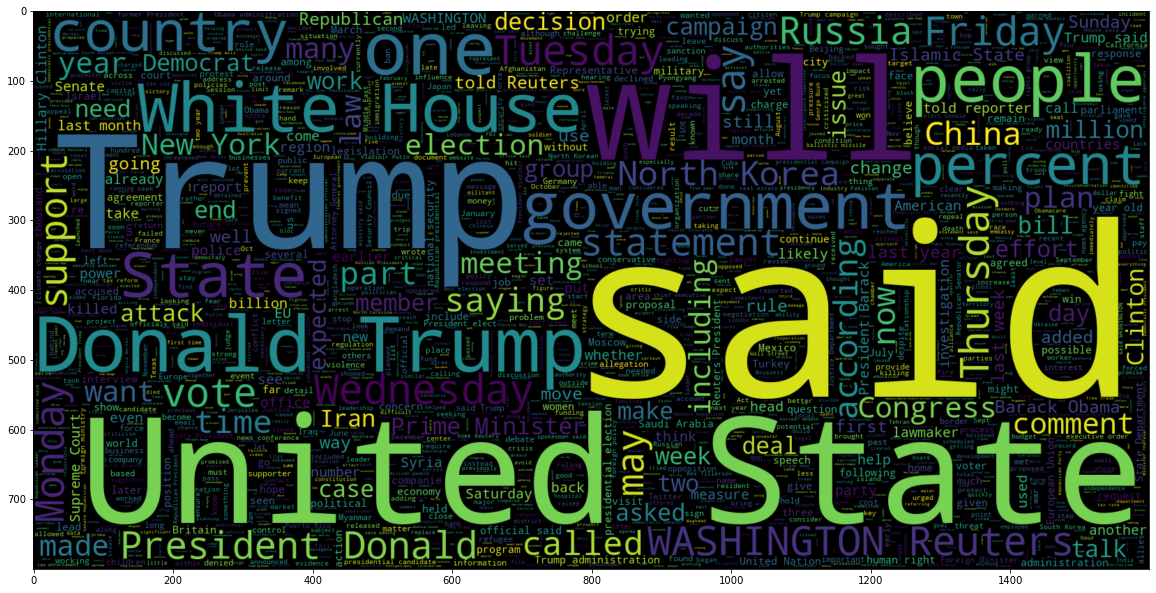

In [19]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(news[news.target == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

## test,train split

데이터를 학습용과 테스트용으로 80:20으로 분리했습니다.

In [20]:
x_train,x_test,y_train,y_test = train_test_split(news['combine'],
                                                 news.target, test_size=0.2, random_state=2020)


## 여러가지 모델 적용

- pipeline은 연속적인 함수를 실행시킬수있습니다.
- pipeline을 이용하여 뉴스 데이터의 combine컬럼을 pipeline 순서대로 벡터화 시키고, 역문서 빈도를 적용하고, 모델을 적용했습니다.


## Logistic Regression Classifier

- Regression: 숫자를 예측
- Classification: 정해진 카테고리를 정하는 것(0, 1)

In [22]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

acc_log = (round(accuracy_score(y_test, prediction)*100,2))
print("accuracy: {}%".format(acc_log))

accuracy: 98.74%


## Support Vector Classifier

- 기계 학습의 분야 중 하나로 패턴 인식, 자료 분석을 위한 지도학습 모델

In [23]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LinearSVC())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
acc_svc = (round(accuracy_score(y_test, prediction)*100,2))
print("accuracy: {}%".format(acc_svc))

accuracy: 99.55%


## Multinomial Naive Bayes Classifier

- Multinomial Naive Bayes Classifier 모델에서는, 특성 벡터들은 다항분포에 의해 생성된 어떤 이벤트의 빈도수를 나타냅니다.
- 하나의 문서에서 단어의 출현을 나타내는 이벤트를 가지고 문서 분류를 하는데 사용되는 이벤트 모델입니다.

In [24]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
acc_MNB = (round(accuracy_score(y_test, prediction)*100,2))
print("accuracy: {}%".format(acc_MNB))

accuracy: 93.61%


## Bernoulli Naive Bayes Classifier

- Bernoulli Naive Bayes Classifier 모델에서, 특성들은 입력들을 설명하는 독립적인 부울 값(이진 변수)입니다.
- Multinomial Naive Bayes Classifier의 특성 벡터가 이벤트의 빈도수를 나타내는 반면, Bernoulli Naive Bayes Classifier 모델은 이벤트 발생 여부를 나타내는 부울 값을 가집니다.
- 이진변수의 발생이 특성으로 사용되는 문서 분류 작업에 대하여 널리 이용됩니다.

In [25]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', BernoulliNB())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
acc_BNB = (round(accuracy_score(y_test, prediction)*100,2))
print("accuracy: {}%".format(acc_BNB))

accuracy: 96.25%


## Gradient Boost Classifier

- Gradient Boost Classifier은 회귀분석 또는 분류 분석을 수행할 수 있는 예측모형이며 예측모형의 앙상블 방법론 중 부스팅 계열에 속하는 알고리즘입니다.

머신러닝에서 앙상블 모델 중 부스팅은 정말 강력하지만
- 느리고
- 과적합의 이슈가 있다

는 단점이 있습니다.

In [26]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', GradientBoostingClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=55))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
acc_GBC = (round(accuracy_score(y_test, prediction)*100,2))
print("accuracy: {}%".format(acc_GBC))

accuracy: 99.5%


## XGBoost Classifier

- Gradient Boost Classifier를 기반으로 합니다.
- Gradient Boost Classifier보다 빠릅니다.
- 과적합 방지가 가능한 규제가 포함되어 있습니다.

In [27]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', XGBClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=2020))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
acc_XC = (round(accuracy_score(y_test, prediction)*100,2))
print("accuracy: {}%".format(acc_XC))

[11:25:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { loss } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


accuracy: 99.49%


## Decision Tree

- 의사결정나무는 데이터를 분석하여 이들 사이에 존재하는 패턴을 예측 가능한 규칙들의 조합으로 나타내며, 그 모양이 '나무' 와 같다고 해서 의사결정나무라 불립니다. 

- Decision Tree는 과적합이 될 가능성이 높다는 약점을 가지고 있습니다.

In [29]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=2020))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
acc_DT = (round(accuracy_score(y_test, prediction)*100,2))
print("accuracy: {}%".format(acc_DT))

accuracy: 99.58%


## Random Forest Classifier

- 여러개의 decision tree를 형성하고 새로운 데이터 포인트를 각 트리에 동시에 통과시키며, 각 트리가 분류한 결과에서 투표를 실시하여 가장 많이 득표한 결과를 최종 분류 결과로 선택합니다.
- 랜덤 포레스트가 생성한 일부 트리는 과적합 될 수 있지만, 많은 수의 트리를 생성함으로써 과적합이 예측하는데 있어 큰 영향을 미치지 못 하도록 예방합니다.

In [30]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
acc_RF = (round(accuracy_score(y_test, prediction)*100,2))
print("accuracy: {}%".format(acc_RF))

accuracy: 99.34%


## KNN Classifier

- k-NN 분류에서 객체는 k개의 최근접 이웃 사이에서 가장 공통적인 항목에 할당되는 객체로 과반수 의결에 의해 분류됩니다.

In [31]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', KNeighborsClassifier(n_neighbors = 10,weights = 'distance',algorithm = 'brute'))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
acc_knn = (round(accuracy_score(y_test, prediction)*100,2))
print("accuracy: {}%".format(acc_knn))

accuracy: 90.82%


## 모델 정확도 비교

In [36]:
models = pd.DataFrame({
    'Model': ['Logistic Regression Classifier',
              'Support Vector Classifier',
             'Multinomial Naive Bayes Classifier',
             'Bernoulli Naive Bayes Classifier',
             'Gradient Boost Classifier',
             'XGBoost Classifier',
             'Decision Tree',
             'Random Forest Classifier',
             'KNN Classifier'],
    'Score': [acc_log,
              acc_svc,
              acc_MNB,
              acc_BNB,
              acc_GBC,
              acc_XC,
              acc_DT,
              acc_RF,
              acc_knn
             ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
6,Decision Tree,99.58
1,Support Vector Classifier,99.55
4,Gradient Boost Classifier,99.50
5,XGBoost Classifier,99.49
7,Random Forest Classifier,99.34
0,Logistic Regression Classifier,98.74
3,Bernoulli Naive Bayes Classifier,96.25
2,Multinomial Naive Bayes Classifier,93.61
8,KNN Classifier,90.82


#### Decision Tree 모델의 정확도가 가장 높습니다.

# Decision Tree

### 분류

In [38]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=2020))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.58%


### Compare the train-set and test-set accuracy

In [39]:
prediction = model.predict(x_train)
print("train accuracy: {}%".format(round(accuracy_score(y_train, prediction)*100,2)))

train accuracy: 99.91%


In [40]:
prediction = model.predict(x_test)
print("train accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

train accuracy: 99.58%


훈련용 모델은 99.91%이고, 테스트용 모델은 99.58%로 큰 차이를 보이지 않아서 과대적합이 아닌 것을 알 수 있습니다.

### Visualize decision-trees

In [41]:
from nltk.tokenize import word_tokenize,sent_tokenize
from keras.preprocessing import text, sequence
from nltk.tokenize.toktok import ToktokTokenizer

max_features = 36000
max_len = 36000

tok = text.Tokenizer(num_words=max_features)
tok.fit_on_texts(x_train)
tok_train = tok.texts_to_sequences(x_train)
X_train = sequence.pad_sequences(tok_train, maxlen=max_len)
tok_test = tok.texts_to_sequences(x_test)
X_test = sequence.pad_sequences(tok_test, maxlen=max_len)

In [43]:
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100,
            max_depth=10, min_samples_leaf=1)

[Text(1920.9268667296787, 5188.909090909091, 'X[35999] <= 39.5\ngini = 0.499\nsamples = 35918\nvalue = [18741, 17177]'),
 Text(845.8341209829867, 4694.727272727273, 'X[35999] <= 32.5\ngini = 0.234\nsamples = 8142\nvalue = [7041, 1101]'),
 Text(375.7797731568998, 4200.545454545454, 'X[35905] <= 3.5\ngini = 0.499\nsamples = 2057\nvalue = [991, 1066]'),
 Text(115.70061436672968, 3706.363636363636, 'X[35972] <= 0.5\ngini = 0.337\nsamples = 509\nvalue = [109, 400]'),
 Text(47.46691871455577, 3212.181818181818, 'X[35976] <= 2.0\ngini = 0.149\nsamples = 37\nvalue = [34, 3]'),
 Text(36.9187145557656, 2718.0, 'gini = 0.0\nsamples = 30\nvalue = [30, 0]'),
 Text(58.01512287334594, 2718.0, 'X[35993] <= 206.0\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(47.46691871455577, 2223.818181818182, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(68.5633270321361, 2223.818181818182, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(183.9343100189036, 3212.181818181818, 'X[35925] <= 73.0\ngini = 0.26

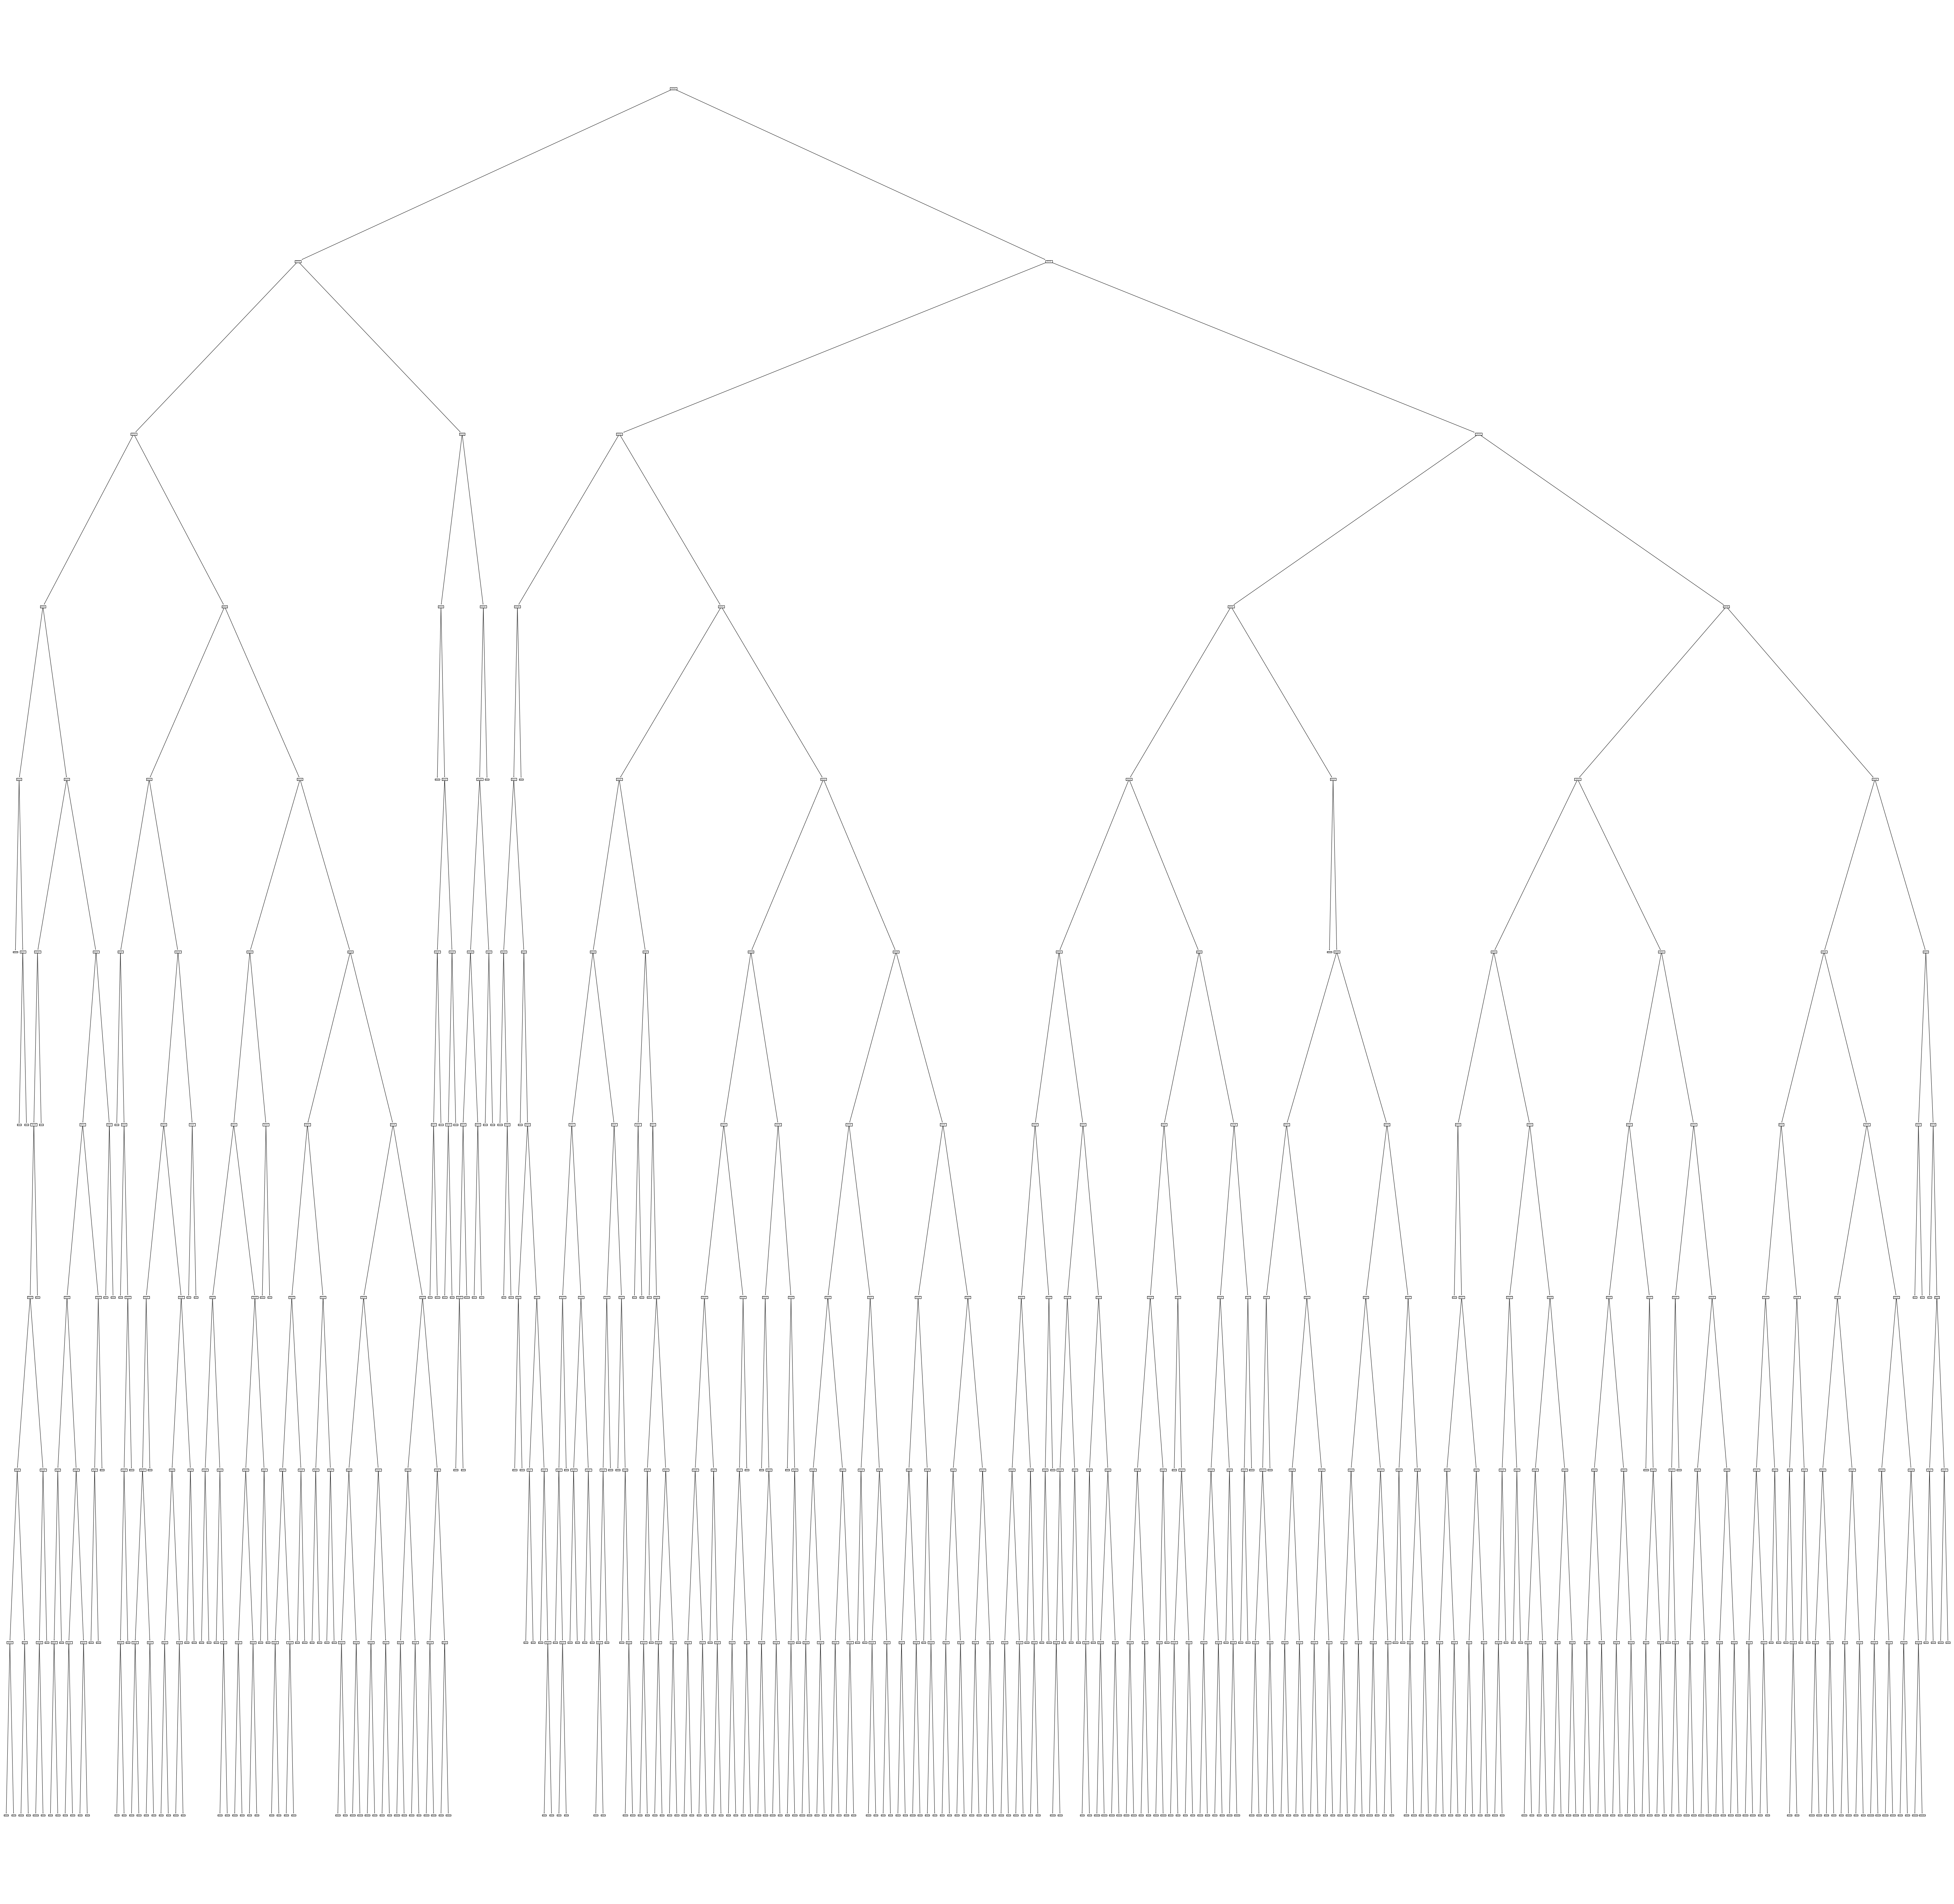

In [44]:
plt.figure(figsize=(100,100))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

### confusion_matrix

In [45]:
dt_cm = confusion_matrix(y_test, prediction)

print(dt_cm)

[[4719   21]
 [  17 4223]]


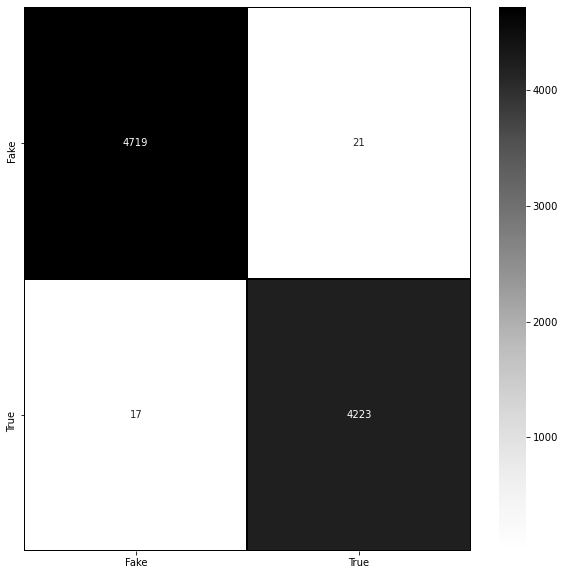

In [46]:
plt.figure(figsize = (10,10))
sns.heatmap(dt_cm,cmap= "Greys", linecolor = 'black', linewidth = 1,
            annot = True, fmt='', xticklabels = ['Fake','True'],
            yticklabels = ['Fake','True'])

#### 잘못 분류된 데이터가 적은 것으로 보아 모델이 잘 작동하고 있습니다.